In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, model_selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import math as ma
from tqdm import tqdm
import matplotlib.pyplot as plt



**We are using Inbuilt Dataset because the downloaded dataset is in the form of Dataframe which has words as row value and it is a hectic task to convert it into a document and then convert it into X,Y format**

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [3]:
import nltk
nltk.download('stopwords')
## downloading stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hashi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hashi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\hashi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\hashi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\hashi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\hashi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\h

[nltk_data]    |   Package problem_reports is already up-to-date!
[nltk_data]    | Downloading package propbank to
[nltk_data]    |     C:\Users\hashi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\hashi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\hashi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\hashi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\hashi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc t

[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     C:\Users\hashi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\hashi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\hashi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\hashi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\hashi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-

True

In [5]:
stopwords= set(stopwords.words('english'))                                            

In [6]:
print(stopwords)   ## stopwords

{'theirs', 'this', 'from', 'where', 'should', 'he', 'were', 'doing', "it's", 'after', 'both', 'than', 'again', 'same', 'own', "weren't", 'our', "that'll", 'out', "wasn't", "wouldn't", 'before', "needn't", 'so', 'at', 'itself', 'd', 'y', 'once', 'until', 'ourselves', 'having', 'did', 'ma', 'between', 'couldn', "don't", 'further', 'shan', 'too', 'my', 'aren', "should've", 'been', "won't", 'yours', 'by', 'with', "haven't", "you'll", 'can', 'while', 'are', 'was', 'for', 'which', 'as', 'below', 'i', 'them', 'each', 'whom', 'other', 'him', 'does', 'now', 'have', 'because', 'their', 'nor', 'they', 'these', "mustn't", "shouldn't", 'an', 'hasn', 'is', 'haven', 'yourselves', 'when', 'about', 'under', 'do', 'be', 'over', 'herself', 'some', 'there', 'had', 'a', 'shouldn', 'or', 'you', 'yourself', "she's", 'has', 'most', 'who', 've', 'all', 'we', 'such', 'through', "shan't", 'very', 'doesn', "couldn't", 'mightn', 'myself', "didn't", 'on', 'hadn', 'in', 'isn', 'o', 'but', 'needn', "doesn't", 'down',

In [7]:
## fetching the news dataset.
news =  datasets.fetch_20newsgroups()

In [8]:
news.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [9]:
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(news.data, news.target)

**We are converting the data into a word dictionary where key is the word and value is its frequency**

In [11]:
d = {}

for i in range(len(x_train)):
    data = x_train[i]                ## selecting the dictionary data
    words = word_tokenize(data)      ## tokenizing data. If not using this, we need to iterate over data and extract the single
                                     ## word.
    
    for j in words:
        if j not in stopwords:
            d[j] = d.get(j, 0) + 1
            
            
            
d
            

{'From': 9132,
 ':': 82630,
 'joslin': 15,
 '@': 38074,
 'pogo.isp.pitt.edu': 15,
 '(': 48214,
 'David': 1114,
 'Joslin': 20,
 ')': 51584,
 'Subject': 8778,
 'Re': 5907,
 'Silence': 9,
 'concurance': 5,
 'Distribution': 1894,
 'usa': 537,
 'Organization': 8202,
 'Intelligent': 23,
 'Systems': 510,
 'Program': 104,
 'Lines': 8517,
 '80': 252,
 'For': 1266,
 'missing': 154,
 'context': 226,
 'thrilling': 3,
 'discussion': 370,
 'Jim': 495,
 'I': 36693,
 ',': 119667,
 'wrote': 685,
 'following': 714,
 'e-mail': 432,
 'pointed': 120,
 'taken': 389,
 'quote': 181,
 '>': 136383,
 'In': 7108,
 't.r.m': 16,
 '.': 108503,
 'Robert': 509,
 'Weiss': 54,
 'writes': 5859,
 '[': 9163,
 'promise': 63,
 'Psalm': 18,
 '9:10': 4,
 ']': 10392,
 'Gee': 49,
 'since': 1229,
 'would': 6927,
 "n't": 10908,
 'hypocritical': 19,
 'must': 1327,
 'really': 1547,
 'busy': 56,
 'arguing': 77,
 'out-of-context': 4,
 'extracted': 13,
 'translations': 26,
 '!': 16024,
 'He': 1611,
 'directed': 60,
 'similar': 411,
 'a

In [12]:
## now sorting the dictionary.

sort_d = {}
for key,value in sorted(d.items(), key=lambda kv : kv[1], reverse=True):
    sort_d[key] = value

**As we can see above, there are many symbols, single letters, and numbers which have a lot of frequency which does not mean anything to us. i.e. they are stopwords.  
We need to remove them.**

In [13]:
## removing stopwords. 
import re

chars = re.compile('[@_!#$%^&*()<>?/\|}{~:]')


sorted_d = {}

for i, j in sort_d.items():
    if len(i) == 1 or len(i) == 2 or i == chars.search(i):
        continue
    else:
        sorted_d[i] = j
sorted_d

{"'AX": 44442,
 'The': 11871,
 "n't": 10908,
 'From': 9132,
 'Subject': 8778,
 'Lines': 8517,
 'Organization': 8202,
 'would': 6927,
 'writes': 5859,
 'one': 5814,
 '...': 5648,
 'article': 4973,
 'people': 4323,
 'like': 4179,
 'University': 4046,
 'know': 3840,
 'get': 3524,
 'think': 3338,
 'This': 3307,
 'MAX': 3191,
 'use': 2985,
 'time': 2825,
 'could': 2619,
 'also': 2565,
 'good': 2425,
 'You': 2384,
 'What': 2253,
 'And': 2207,
 'even': 2172,
 'way': 2145,
 'make': 2116,
 'see': 2089,
 'may': 2072,
 'much': 2048,
 'say': 2047,
 'But': 1973,
 'two': 1960,
 'God': 1954,
 'many': 1909,
 'Distribution': 1894,
 'want': 1893,
 'right': 1871,
 'They': 1866,
 'said': 1860,
 'Nntp-Posting-Host': 1848,
 "'ve": 1821,
 'There': 1798,
 'first': 1778,
 'new': 1771,
 'used': 1753,
 'system': 1735,
 'NNTP-Posting-Host': 1730,
 'work': 1694,
 'something': 1645,
 'well': 1635,
 'need': 1626,
 'world': 1572,
 'anyone': 1569,
 'problem': 1551,
 'really': 1547,
 'believe': 1545,
 "'re": 1513,
 'go

In [14]:
len(sorted_d.keys())

160026

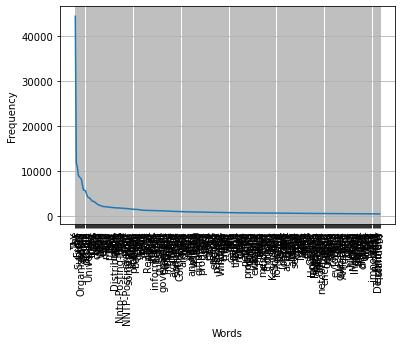

In [15]:

x = []
y = []
k= 0
for i, j in sorted_d.items():
    x.append(i)
    y.append(j)
    k += 1
    if k == 299:
        break
        
        
plt.plot(x, y)
plt.grid()
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

In [16]:
## seprating features

features = []

for i in sorted_d:
    features.append(i)
len(features)

160026

In [17]:
## checking graph
import matplotlib.pyplot as plt



In [18]:
## picking top 6000 words from the dictionary as the features
import itertools
dictionary = dict(itertools.islice(sorted_d.items(), 6000))

In [19]:
feature = []
for i in dictionary:
    feature.append(i)

In [20]:
feature

["'AX",
 'The',
 "n't",
 'From',
 'Subject',
 'Lines',
 'Organization',
 'would',
 'writes',
 'one',
 '...',
 'article',
 'people',
 'like',
 'University',
 'know',
 'get',
 'think',
 'This',
 'MAX',
 'use',
 'time',
 'could',
 'also',
 'good',
 'You',
 'What',
 'And',
 'even',
 'way',
 'make',
 'see',
 'may',
 'much',
 'say',
 'But',
 'two',
 'God',
 'many',
 'Distribution',
 'want',
 'right',
 'They',
 'said',
 'Nntp-Posting-Host',
 "'ve",
 'There',
 'first',
 'new',
 'used',
 'system',
 'NNTP-Posting-Host',
 'work',
 'something',
 'well',
 'need',
 'world',
 'anyone',
 'problem',
 'really',
 'believe',
 "'re",
 'going',
 'still',
 'find',
 'back',
 'years',
 'take',
 'How',
 "'ll",
 'must',
 'Reply-To',
 'using',
 'year',
 'might',
 'point',
 'That',
 'things',
 'information',
 'For',
 'better',
 'help',
 'question',
 'got',
 'since',
 'last',
 'government',
 'never',
 'program',
 'without',
 'made',
 'number',
 'file',
 'Thanks',
 'sure',
 'thing',
 'available',
 'David',
 'read',


## Now to get data into X,Y format, we need to follow the following steps.**  
1. Create DataFrame with columns as words and add Rows as NaN where no of rows is No of Documents(i.e. train or test data).  
2. Then convert all the column values to 0.  
3. Then we run a for loop on documents Each document will update a single row.  
   In each document, we tokenize the words and then iteratte each word.  
4. Then for each word, we check position and column using $iloc[i][j]$ where i is row and j is column name.  
   If it throws KeyError, which means the column is not present or the word is not present in the DataFrame. 
   So we continue the search by skipping it.  
   If the key is found or document is completed, we iterate it by 1.  
   Above step is done by try catch block.  
**At the end, we get the data in X, Y format**

In [21]:
df = pd.DataFrame(columns = feature, index = [i for i in range(len(x_train))])

In [22]:
df

,'AX,The,n't,From,Subject,Lines,Organization,would,writes,one,...,Iraq,1923,absence,shadow,seizure,Singer,160,stress,Comments,LAW
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
## Initializing all rows with 0.  
for col in df.columns:
    df[col].values[:] = 0

In [24]:
df

,'AX,The,n't,From,Subject,Lines,Organization,would,writes,one,...,Iraq,1923,absence,shadow,seizure,Singer,160,stress,Comments,LAW
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
## this one will take time.
## Updating the frequency of the word.

i = 0
for j in x_train:
    oneword = j
    words = word_tokenize(oneword)
    for k in words:
        try:
            df.iloc[i][k] +=1
        except KeyError:
            continue
    i += 1

In [26]:
df
## now, we have the data in X, Y format.  

,'AX,The,n't,From,Subject,Lines,Organization,would,writes,one,...,Iraq,1923,absence,shadow,seizure,Singer,160,stress,Comments,LAW
0,0,1,7,1,1,1,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
1,0,3,2,1,1,1,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8480,0,1,14,1,1,1,1,2,1,6,...,0,0,0,0,0,0,0,0,0,0
8481,0,3,2,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8482,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8483,0,0,2,1,1,1,1,0,2,4,...,0,0,0,0,0,0,0,0,0,0


ref used = https://stackoverflow.com/questions/42636765/how-to-set-all-the-values-of-an-existing-pandas-dataframe-to-zero

**Now we check if there are any column which has all values as 0.**

In [27]:
j = 1
for i in df:
    if df[i].sum() == 0:
        print(i)
    elif j == 6000:  ## for checking 6000 columns.
        print('No column has sum 0')
    j+=1

No column has sum 0


**Seems like there is no column with all 0's.**

## For testing Data
**Now we convert the test Data as well.  
We can use a function to do this task but this way is better to understand step by step process.**

In [28]:
d2 = {}

for i in range(len(x_test)):
    data = x_train[i]                ## selecting the dictionary data
    words = word_tokenize(data)      ## tokenizing data. If not using this, we need to iterate over data and extract the single
                                     ## word.
    
    for j in words:
        if j not in stopwords:
            d2[j] = d2.get(j, 0) + 1
d2           

{'From': 3029,
 ':': 27217,
 'joslin': 4,
 '@': 12026,
 'pogo.isp.pitt.edu': 4,
 '(': 15357,
 'David': 351,
 'Joslin': 7,
 ')': 16536,
 'Subject': 2929,
 'Re': 2012,
 'Silence': 6,
 'concurance': 4,
 'Distribution': 651,
 'usa': 173,
 'Organization': 2744,
 'Intelligent': 10,
 'Systems': 175,
 'Program': 24,
 'Lines': 2843,
 '80': 65,
 'For': 425,
 'missing': 31,
 'context': 70,
 'thrilling': 1,
 'discussion': 116,
 'Jim': 201,
 'I': 11977,
 ',': 38126,
 'wrote': 224,
 'following': 248,
 'e-mail': 123,
 'pointed': 33,
 'taken': 116,
 'quote': 63,
 '>': 28875,
 'In': 2366,
 't.r.m': 6,
 '.': 35343,
 'Robert': 182,
 'Weiss': 25,
 'writes': 1975,
 '[': 2722,
 'promise': 22,
 'Psalm': 6,
 '9:10': 1,
 ']': 3199,
 'Gee': 12,
 'since': 396,
 'would': 2176,
 "n't": 3437,
 'hypocritical': 8,
 'must': 397,
 'really': 481,
 'busy': 19,
 'arguing': 24,
 'out-of-context': 1,
 'extracted': 2,
 'translations': 8,
 '!': 5599,
 'He': 425,
 'directed': 23,
 'similar': 156,
 'accusation': 1,
 'hypocrisy'

In [29]:
## now sorting the dictionary.

sorte_d = {}
for key,value in sorted(d2.items(), key=lambda kv : kv[1], reverse=True):
    sorte_d[key] = value

In [30]:
## removing stopwords. 
import re

chars = re.compile('[@_!#$%^&*()<>?/\|}{~:]')


sorted_d1 = {}

for i, j in sorte_d.items():
    if len(i) == 1 or len(i) == 2 or i == chars.search(i):
        continue
        
    else:
        sorted_d1[i] = j
sorted_d1

{'The': 3893,
 "n't": 3437,
 'From': 3029,
 'Subject': 2929,
 'Lines': 2843,
 'Organization': 2744,
 'would': 2176,
 'one': 1986,
 'writes': 1975,
 '...': 1869,
 'article': 1672,
 'people': 1373,
 'like': 1352,
 'University': 1335,
 'get': 1226,
 'know': 1189,
 'This': 1139,
 'think': 1136,
 'use': 1016,
 'time': 884,
 'also': 878,
 'could': 804,
 'You': 792,
 'good': 784,
 'What': 769,
 'And': 752,
 'make': 699,
 'much': 684,
 'see': 680,
 'may': 667,
 'say': 665,
 'way': 664,
 'But': 661,
 'even': 660,
 'new': 659,
 'Distribution': 651,
 "'ve": 641,
 'Nntp-Posting-Host': 633,
 'two': 620,
 'said': 618,
 'many': 612,
 'want': 604,
 'used': 589,
 'NNTP-Posting-Host': 587,
 'right': 573,
 'work': 572,
 'system': 570,
 'They': 554,
 'well': 551,
 'problem': 550,
 'something': 540,
 'going': 536,
 'There': 520,
 'believe': 511,
 'information': 509,
 'world': 509,
 "'re": 505,
 'anyone': 504,
 'first': 501,
 'need': 497,
 'God': 486,
 'really': 481,
 'government': 472,
 'How': 466,
 'using

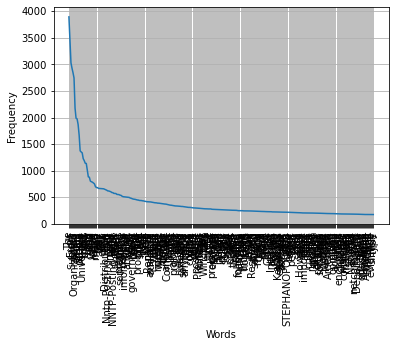

In [31]:

## plotting graph for words

x = []
y = []
k= 0
for i, j in sorted_d1.items():
    x.append(i)
    y.append(j)
    k += 1
    if k == 299:
        break
        
  



plt.plot(x, y)
plt.grid()
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

In [32]:
features1 = []

for i in sorted_d:
    features1.append(i)
len(features1)

160026

In [33]:
## picking top 6000 words from the dictionary as the features
import itertools
dictionary1 = dict(itertools.islice(sorted_d1.items(), 6000))

In [34]:
feature1 = []
for i in dictionary:
    feature1.append(i)

**Now getting test data in X, Y format**

In [35]:
df1 = pd.DataFrame(columns = feature1, index = [i for i in range(len(x_test))])

In [36]:
df1

,'AX,The,n't,From,Subject,Lines,Organization,would,writes,one,...,Iraq,1923,absence,shadow,seizure,Singer,160,stress,Comments,LAW
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
## Initializing all rows with 0.  
for col in df1.columns:
    df1[col].values[:] = 0

In [38]:
df1

,'AX,The,n't,From,Subject,Lines,Organization,would,writes,one,...,Iraq,1923,absence,shadow,seizure,Singer,160,stress,Comments,LAW
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
## this one will take time.
## Updating the frequency of the word.

i = 0
for j in x_test:
    oneword = j
    words = word_tokenize(oneword)
    for k in words:
        try:
            df1.iloc[i][k] +=1
        except KeyError:
            continue
    i += 1

In [40]:
df1

,'AX,The,n't,From,Subject,Lines,Organization,would,writes,one,...,Iraq,1923,absence,shadow,seizure,Singer,160,stress,Comments,LAW
0,0,0,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,0,0,1,1,1,1,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2825,0,4,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2826,0,1,2,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2827,0,0,2,2,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
j = 1
for i in df1:
    if df1[i].sum() == 0:
        print(i)
    elif j == 6000:
        print("NO columns with 0 sum")
        

55.0
MOV
MS.
MYERS
anonymity
X^-
0EL
EDM
0EM
Sabres
OFFICIAL
Bullock
PHI
SENIOR
OTT
0.333
HAR
naval
Onur
Yalcin
0.00
A85
migraine
P45
Maria
00-00
Magi
S0G
Sleeve
XTE
RCK
SIGGRAPH
seizure


In [42]:
a = df1.columns
print(len(a))

6000


**Now as we have the data in X,Y format, we use inbuilt Multinomial Naive Bayes**

In [43]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

8485
2829
8485
2829


In [44]:
print(len(df))
print(len(df1))
## seems like we are good to go.

8485
2829


# Using Inbuilt MultinomialNB

In [45]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(df, y_train)
y_pred1 = clf.predict(df1)
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1  ))
for i in confusion_matrix(y_test, y_pred1):
    for j in i:
        print(j, end=' ')
    print()

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       102
           1       0.60      0.76      0.67       139
           2       1.00      0.03      0.07       146
           3       0.57      0.76      0.66       172
           4       0.68      0.82      0.74       151
           5       0.74      0.79      0.77       126
           6       0.69      0.87      0.77       150
           7       0.87      0.78      0.83       172
           8       0.75      0.92      0.83       133
           9       0.90      0.91      0.91       145
          10       0.96      0.92      0.94       147
          11       0.95      0.90      0.93       151
          12       0.72      0.80      0.76       142
          13       0.94      0.84      0.89       161
          14       0.90      0.93      0.92       152
          15       0.88      0.85      0.86       138
          16       0.84      0.90      0.87       137
          17       0.99    

**Seems like a pretty decent score what I conclude is by cleaning more stopwords we might get a good score**

## Now Implementing Naive Bayes.  


In [46]:
## converting dataframe to numpy array so our data can be calculated.

train = df.to_numpy()
test = df1.to_numpy()


We are no more dealing with the labelled data, what we need to do here is we need to make count of words in feature column.  
Now the fit function will be changed a bit. Instead of counting the values in features to calculate probablity, we need to sum it. 
  
  
   
What we need is we need the count of class1, how many times word i occoured -> $count[C_1][w_i]$, divided by within class1 what was the total no of words -> $count[c_1][total \ count]$, which can be written as $$\frac{count[C_1][w_i]}{count[c_1][total \ count]}$$   
So if we find out these counts quickly, we are done.  
What we will do is we will build a dictionary count, the first level of keys in count value will be the class name, which can be found in y. So we will loop over all the values of y, for particular value of y, lets say there are three values a,b,c : we for a, what we can do is choose the documents(which is rows), where y = a, within those documents, we have frequency counts, to find these, lets say $x_a$ is the rows where class is a, to find $count[a][w_i]$, we can ver simply = $x_a[:, i].sum()$, this will give us how many times word i has occured in all documents of class a. So, in a nutshell, $$count[a][w_i] = x_a[:, i].sum()$$  
So the first forloop will be over possible classes, the second forloop will be over the vocabularies(features) that we have. Go through the vocabularies words, and for each word, we are going to fill $count[a][wj _i]$.  
To fill, $count[c_1][total]$, its the sum of all the $count[c_1][w_i]$(which means sum of all the words).  
Once we train the data, we just need to go through all the words in the test document, calculate the probablity.  
  
And the only change in probablity is we are no more dealing with the labelled data, so we dont have to go for particular x[j].  
So we have to remove the x[j] from the numerator.(Because we are not counting the label, we are summing the count of words).

In [47]:
def fit(x_train, y_train):  ## for fitting the training data.
    result = {}
    classes = set(y_train)
    result['total_data'] = 0   ## we initialize becase it is not labelled data so we cannot do len(y_train)
                               ## directly. we need to calculate the total data.
    for current_class in classes:
        result[current_class] = {}
        
        current_class_rows = (y_train == current_class)    
        x_train_current = x_train[current_class_rows]  ## for selecting the rows where class is current_class
        y_train_current = y_train[current_class_rows]  ## same as above.
        
        num_features = x_train.shape[1]
        
        result[current_class]['total_count'] = 0    ## initializing this to 0 coz we want to count total of current_class
                                                    ## len(ytrain) will give us unique values but this is not Labelled data.
        
        for j in range(num_features):
            result[current_class][j] = x_train_current[:, j].sum()   ## for selecting values where class feature is j.
            
            result[current_class]['total_count'] += result[current_class][j]   ## calculating total count.
             
        result['total_data'] += result[current_class]['total_count']   ## for calculating no of data in document vocabulary.  
    
    return result


## we will calculate log probablities with laplace correction applied.
def probablity(dictionary, x, current_class):
    output = np.log(dictionary[current_class]['total_count']) - np.log(dictionary['total_data'])
    num_features = len(x)    ## no of words in vocabulary for laplace correction.  
    for j in range( num_features ):
        xj = x[j]
        if xj == 0:
            continue
        current_class_with_xj = dictionary[current_class][j] + 1   ## numerator 
        current_class_total_count = dictionary[current_class]['total_count'] + num_features  ## denominator
        current_xj_prob = np.log(current_class_with_xj) - np.log(current_class_total_count)
        
        output += current_xj_prob
    return output
        
    
## predicting class for single feature and finding best class on the basis of majority.
def predictSinglePoint(dictionary, x):
    best_p = -1000
    best_class = -111
    first_run = True
    classes = dictionary.keys()   ## here we choose first level keys inside the dict as the classes are there.
    
    for current_class in classes:
        if current_class == 'total_data':   ## excluding 'total_data'
            continue
        p_current_class = probablity(dictionary, x,  current_class)   ## calculating probablity for each class.
        
        if (first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
            first_run = False
    return best_class
            
    
def predict(dictionary, x_test):
    y_pred = []
    for x in x_test:
        x_class = predictSinglePoint(dictionary, x)
        y_pred.append(x_class)
    return y_pred


In [48]:

dic = fit(train, y_train)

In [49]:
y_pred = predict(dic, test)

In [50]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       102
           1       0.58      0.78      0.67       139
           2       1.00      0.03      0.07       146
           3       0.59      0.75      0.66       172
           4       0.71      0.83      0.77       151
           5       0.78      0.77      0.77       126
           6       0.71      0.86      0.78       150
           7       0.84      0.79      0.81       172
           8       0.75      0.92      0.83       133
           9       0.91      0.92      0.91       145
          10       0.96      0.91      0.93       147
          11       0.94      0.90      0.92       151
          12       0.71      0.83      0.76       142
          13       0.92      0.82      0.87       161
          14       0.90      0.95      0.92       152
          15       0.91      0.85      0.88       138
          16       0.87      0.88      0.88       137
          17       0.97    

In [51]:
for i in confusion_matrix(y_test, y_pred):
    for j in i:
        print(j, end = ' ')
    print()

94 0 0 0 0 0 0 0 1 0 0 0 0 0 1 2 0 0 1 3 
0 109 0 12 5 3 2 2 1 0 0 0 3 2 0 0 0 0 0 0 
0 31 5 56 17 20 7 2 0 0 0 0 8 0 0 0 0 0 0 0 
0 9 0 129 15 0 4 3 1 0 0 2 8 1 0 0 0 0 0 0 
0 2 0 5 126 2 6 3 1 0 0 0 3 3 0 0 0 0 0 0 
0 16 0 1 2 97 2 1 4 0 0 0 2 1 0 0 0 0 0 0 
0 1 0 3 1 0 129 3 4 0 0 2 5 0 2 0 0 0 0 0 
0 0 0 1 1 1 11 136 10 0 0 1 8 1 0 0 2 0 0 0 
0 0 0 0 0 0 5 4 123 0 0 0 1 0 0 0 0 0 0 0 
0 1 0 1 0 0 3 1 1 133 4 0 0 0 1 0 0 0 0 0 
0 0 0 1 0 0 2 1 1 5 134 0 1 0 0 0 0 0 2 0 
0 4 0 1 0 1 0 1 0 0 0 136 1 0 2 0 4 0 1 0 
0 4 0 7 6 0 1 1 3 0 0 0 118 1 1 0 0 0 0 0 
0 2 0 0 2 1 2 2 4 1 0 0 6 132 5 2 1 0 0 1 
0 5 0 0 1 0 0 0 1 0 0 0 1 0 144 0 0 0 0 0 
2 3 0 0 0 0 2 0 0 1 1 1 2 0 1 117 1 1 3 3 
1 0 0 0 0 0 2 1 1 2 0 2 0 1 0 0 121 1 5 0 
0 0 0 3 2 0 1 0 3 1 1 0 0 0 1 1 0 138 2 2 
1 0 0 0 0 0 2 1 4 3 0 1 0 1 2 1 3 0 91 2 
11 1 0 0 0 0 0 0 2 0 0 0 0 1 0 6 7 3 3 64 


## Comparison


Inbuilt Classifier Accuracy :  80.48780487804879
Implemented Classifier Accuracy :  80.45245669848002


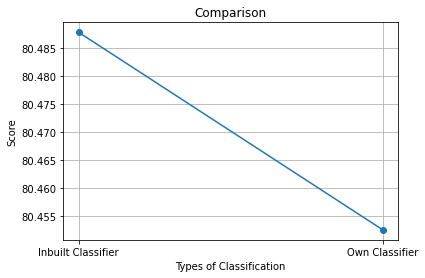

In [52]:
ib = accuracy_score(y_test, y_pred1  )
oc = accuracy_score(y_test, y_pred  )
ib = ib* 100
oc = oc*100
y = [ib, oc]
x = ['Inbuilt Classifier', 'Own Classifier']

print('Inbuilt Classifier Accuracy : ', ib)
print('Implemented Classifier Accuracy : ', oc)

plt.plot(x, y, marker = 'o') 
plt.grid()
plt.xlabel('Types of Classification')
plt.ylabel('Score')
plt.title('Comparison')
plt.show()

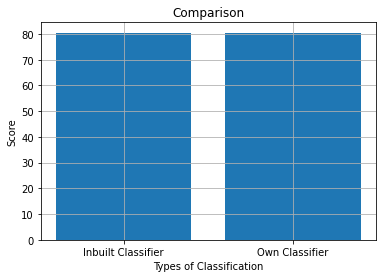

In [53]:
plt.bar(x, y) 
plt.grid()
plt.xlabel('Types of Classification')
plt.ylabel('Score')
plt.title('Comparison')
plt.show()

In [54]:
print('Implemented Classification Report')
print(classification_report(y_test, y_pred))
print('-' * 20)
print('Inbuilt Classification Report')
print(classification_report(y_test, y_pred1))




Implemented Classification Report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       102
           1       0.58      0.78      0.67       139
           2       1.00      0.03      0.07       146
           3       0.59      0.75      0.66       172
           4       0.71      0.83      0.77       151
           5       0.78      0.77      0.77       126
           6       0.71      0.86      0.78       150
           7       0.84      0.79      0.81       172
           8       0.75      0.92      0.83       133
           9       0.91      0.92      0.91       145
          10       0.96      0.91      0.93       147
          11       0.94      0.90      0.92       151
          12       0.71      0.83      0.76       142
          13       0.92      0.82      0.87       161
          14       0.90      0.95      0.92       152
          15       0.91      0.85      0.88       138
          16       0.87      0.88      0.88    

**As we clearly see, we plotted accuracy of two classifier and saw that Implemented Classifier is performing better than Inbuilt one**

**If we see, the implemented MultinomialNB is performing slight better than the Inbuilt one.  
SO lets try to use all the features instead of using 6000 features by converting data in X, Y format using CountVectorizer and then implementing it**

In [55]:
## lets try with CountVectorizer.  
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
xt = v.fit_transform(x_train)  ## Converting training data in X, Y format



In [56]:
clf = MultinomialNB()
xv = v.transform(x_test)   ## We need to use transform on test or else it may give DimensionMismatch Error.


clf.fit(xt, y_train)
y_pred4 = clf.predict(xv)

In [57]:
print(classification_report(y_test, y_pred4))
print(accuracy_score(y_test, y_pred4  ))
for i in confusion_matrix(y_test, y_pred4):
    for j in i:
        print(j, end=' ')
    print()

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       102
           1       0.68      0.87      0.77       139
           2       1.00      0.12      0.21       146
           3       0.67      0.83      0.74       172
           4       0.90      0.80      0.85       151
           5       0.67      0.92      0.78       126
           6       0.88      0.70      0.78       150
           7       0.95      0.80      0.87       172
           8       0.91      0.94      0.93       133
           9       0.98      0.92      0.95       145
          10       0.96      0.95      0.96       147
          11       0.78      0.97      0.87       151
          12       0.90      0.78      0.83       142
          13       0.94      0.91      0.92       161
          14       0.88      0.97      0.93       152
          15       0.79      0.93      0.86       138
          16       0.81      0.91      0.86       137
          17       0.88    

**It gave a better result if we use all the words of all documents rather than using 6000 words which means 
Implemented NaiveBayes will perform much better BUT DEFINITELY TAKE A LOT OF TIME TO DO SO.**